In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [29]:
cols = ["Survived", "Pclass", "Sex", "Age", "Fare"]
df = pd.read_csv("titanic.csv", usecols=cols)
df


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [30]:
from sklearn.preprocessing import LabelEncoder


In [31]:
le_sex = LabelEncoder()
df["Sex_label"] = le_sex.fit_transform(df["Sex"])
df


,Survived,Pclass,Sex,Age,Fare,Sex_label
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,NaN,23.4500,0
889,1,1,male,26.0,30.0000,1


In [32]:
working_df = df.drop("Sex", axis=1)
working_df["Age"] = working_df["Age"].fillna(working_df["Age"].median())
working_df


,Survived,Pclass,Age,Fare,Sex_label
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,28.0,23.4500,0
889,1,1,26.0,30.0000,1


In [33]:
independent = working_df.drop("Survived", axis=1)
target = working_df["Survived"]


In [34]:
independent


,Pclass,Age,Fare,Sex_label
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,28.0,23.4500,0
889,1,26.0,30.0000,1


In [35]:
target


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(independent, target, test_size=0.8)


In [57]:
model = DecisionTreeClassifier()


In [58]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [59]:
model.predict([[1, 40, 50, 0]])


/home/roberto/dev/examples/codebasics/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [47]:
model.score(X_test, y_test)


0.7727910238429172

In [50]:
from sklearn.metrics import confusion_matrix


In [60]:
cm = confusion_matrix(y_test, model.predict(X_test))


Text(69.0, 0.5, 'True')

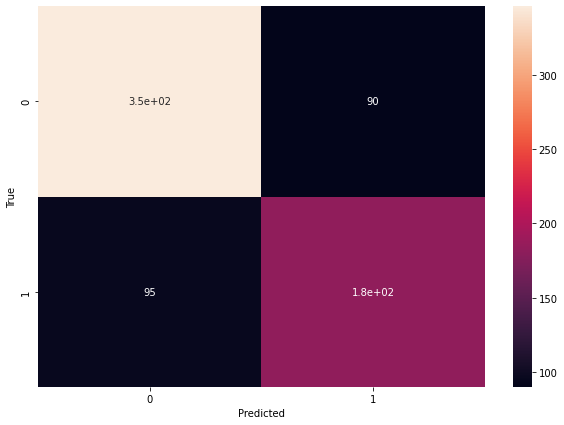

In [62]:
import seaborn as sn
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
